In [49]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
pi = math.pi
from prepare import prep_fish, fish_split, add_scaled_columns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
plt.rc("figure", figsize=(12, 7))
plt.rc("font", size=14)

ImportError: cannot import name 'fish_split' from 'prepare' (/Users/georgearredondo/Desktop/codeup-data-science/estimating_fish_weights/prepare.py)

In [2]:
df = pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df= prep_fish(df)

In [5]:
df.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width,avg_lengths,est_area
0,bream,0.53,9.13,10.00,11.81,4.54,1.58,10.31,36.76
1,bream,0.64,9.45,10.35,12.28,4.91,1.70,10.70,41.26
2,bream,0.75,9.41,10.43,12.24,4.87,1.85,10.70,40.93
3,bream,0.80,10.35,11.42,13.19,5.01,1.75,11.65,45.84
4,bream,0.95,10.43,11.42,13.39,4.90,2.02,11.74,45.18


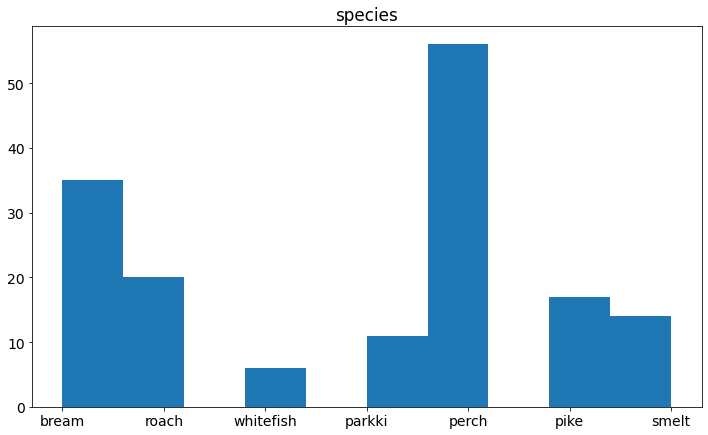

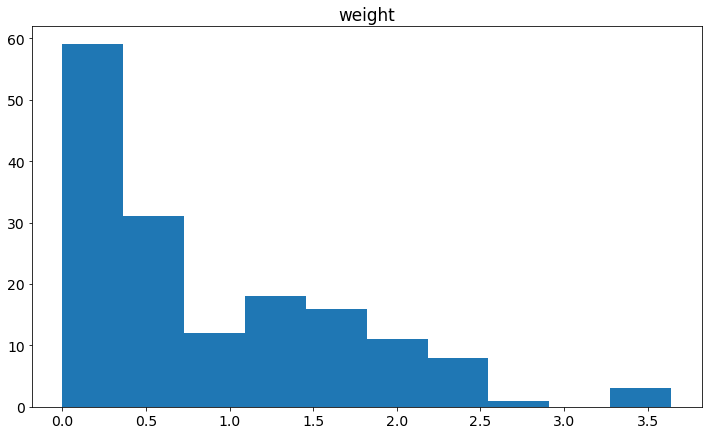

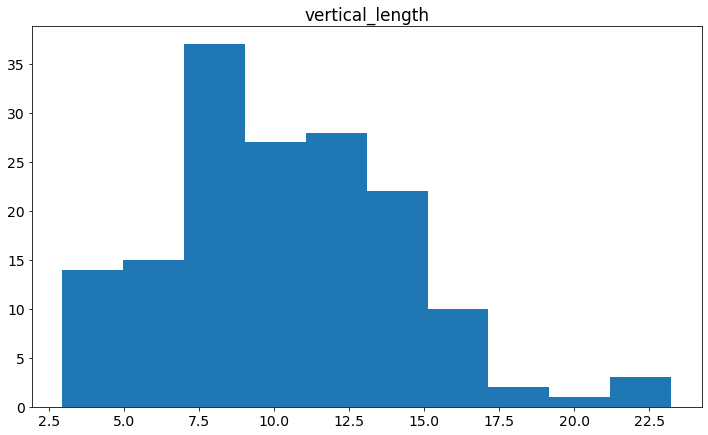

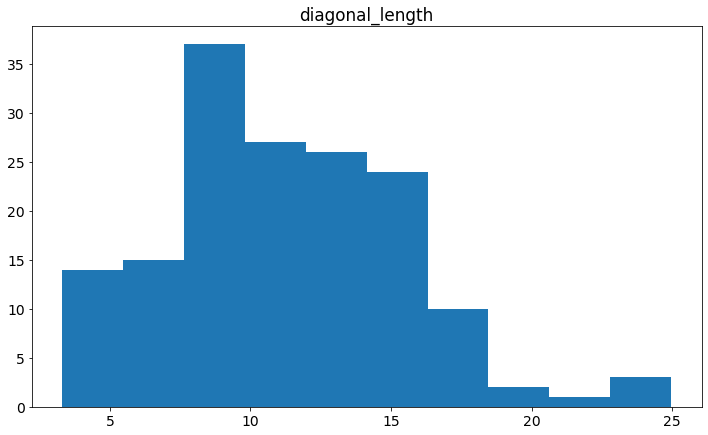

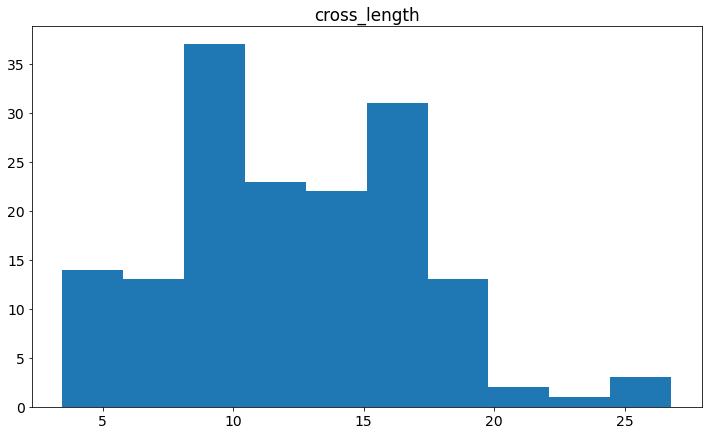

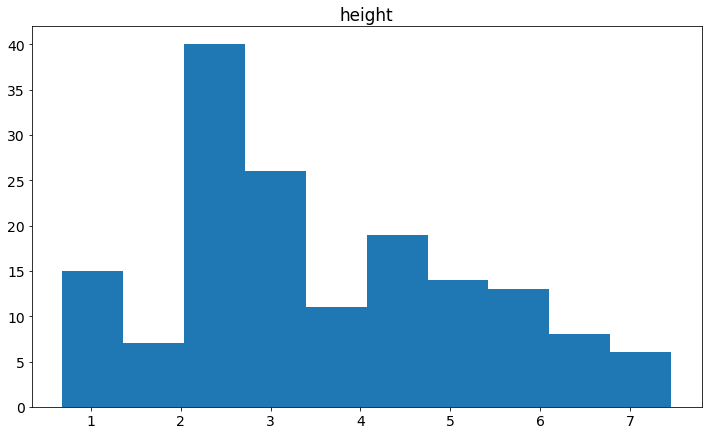

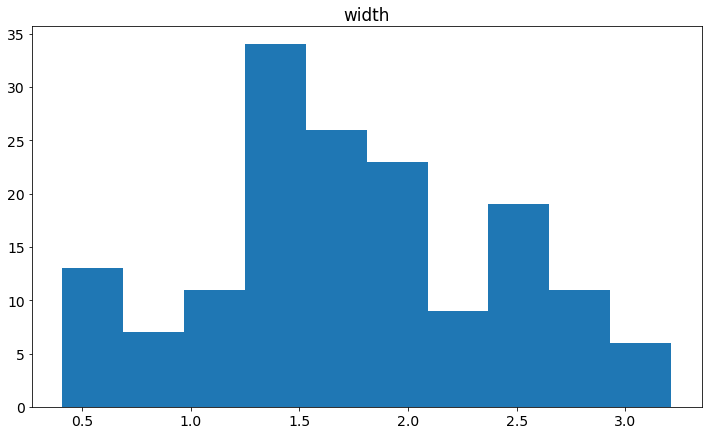

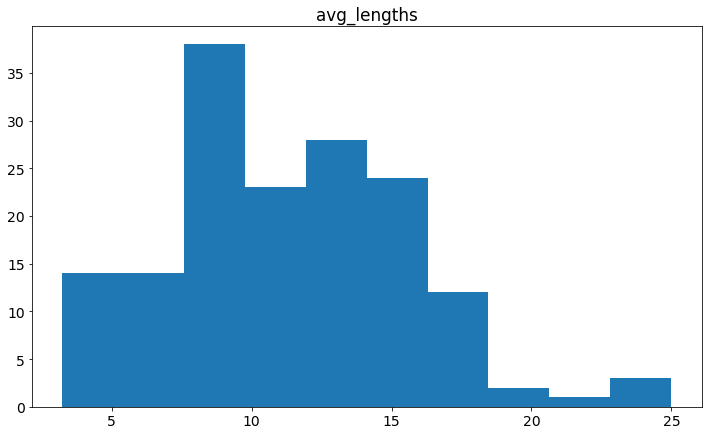

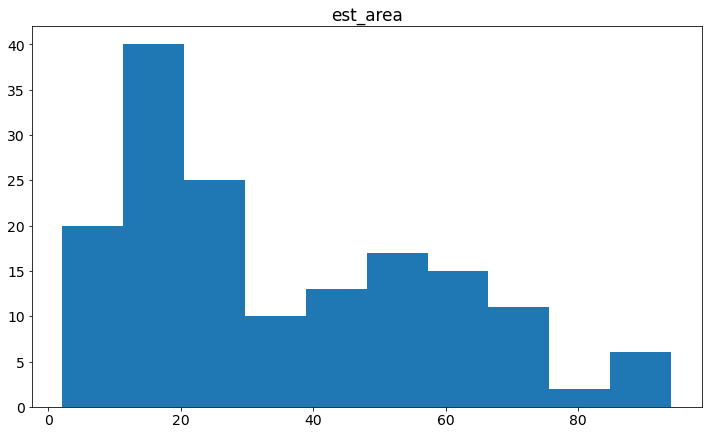

In [6]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Text(0.5, 1.0, 'Correlation Heat Map')

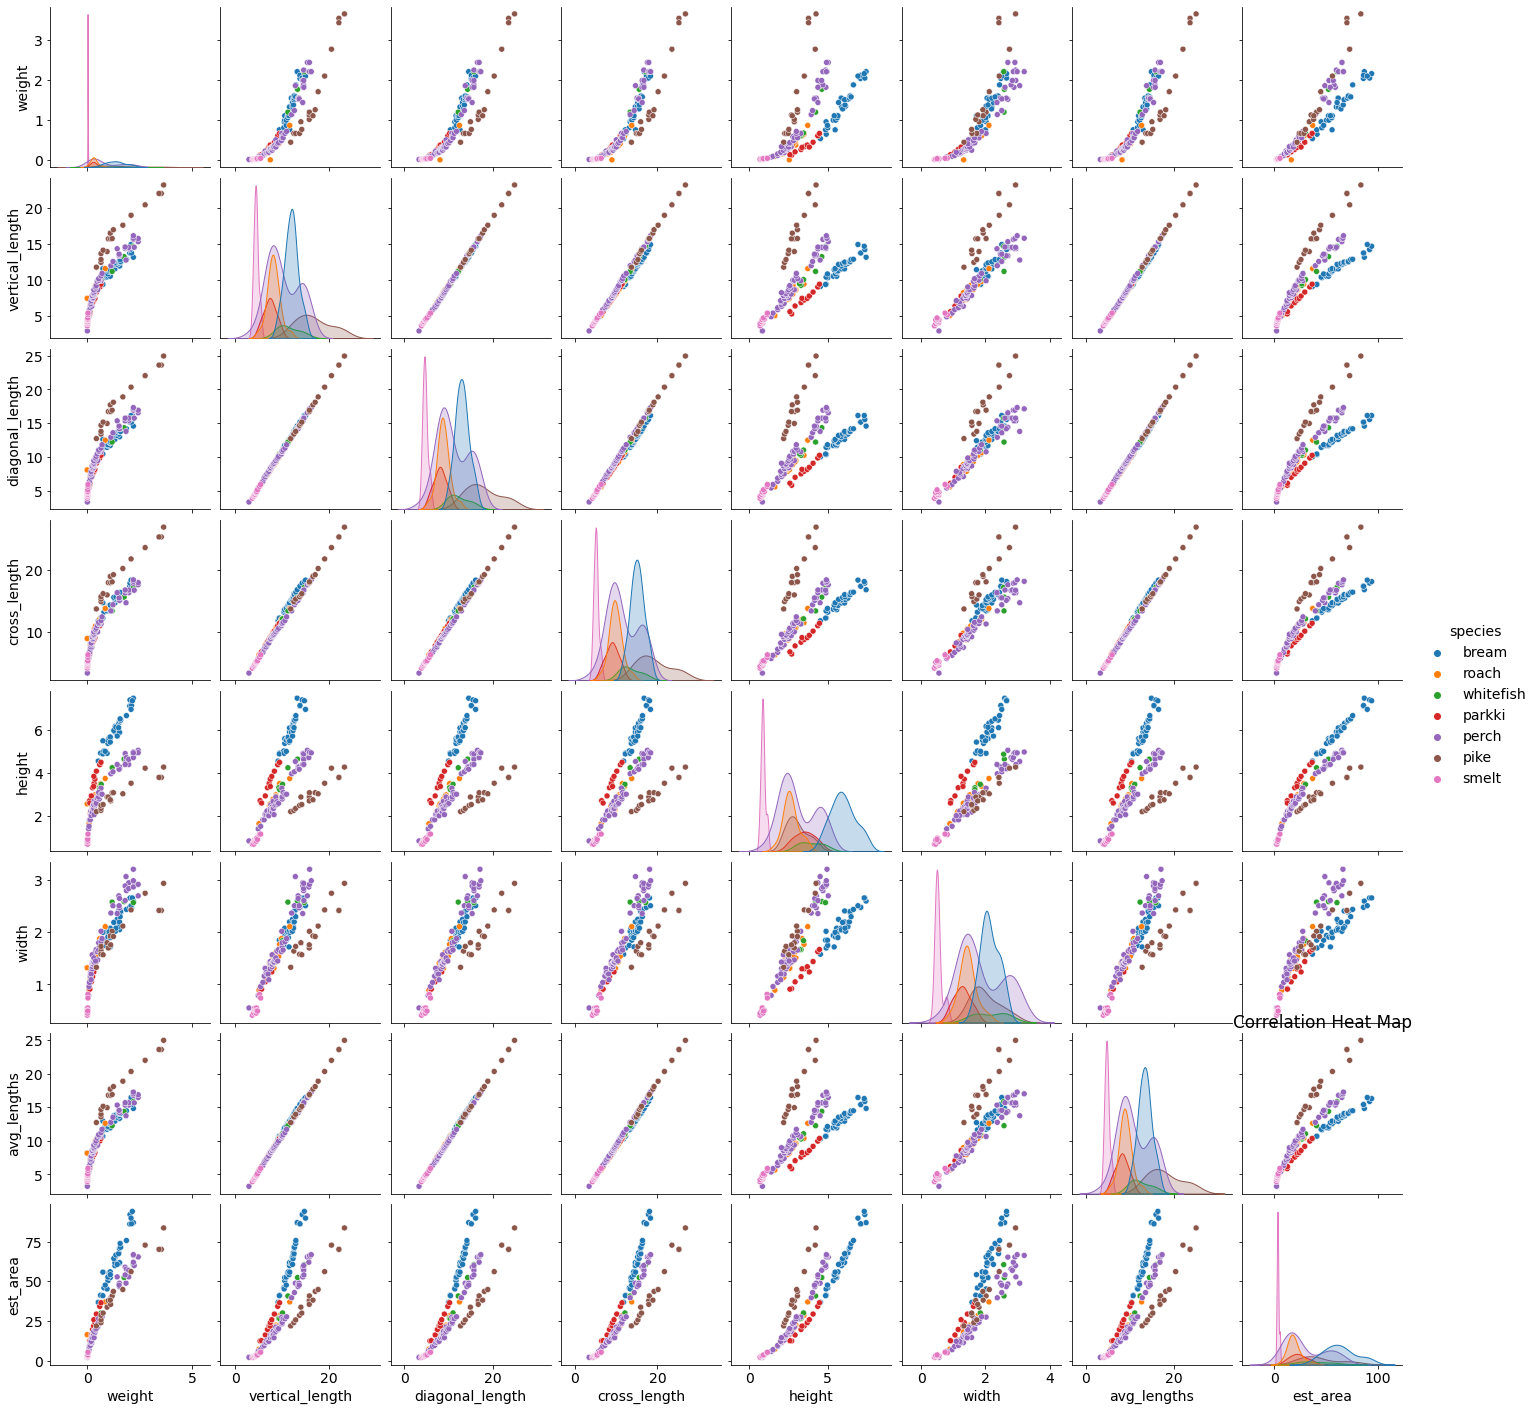

In [7]:
sns.pairplot(df, kind='scatter', hue='species')
plt.title('Correlation Heat Map')

### Distinct clusters of fish height and estimated area and avg length 

In [8]:
# Looking at correlations of variables
df.corr()

,weight,vertical_length,diagonal_length,cross_length,height,width,avg_lengths,est_area
weight,1.000000,0.915761,0.918649,0.923080,0.724036,0.886186,0.920816,0.906493
vertical_length,0.915761,1.000000,0.999511,0.992015,0.625392,0.867209,0.998612,0.823081
diagonal_length,0.918649,0.999511,1.000000,0.994096,0.640492,0.873720,0.999367,0.832951
cross_length,0.923080,0.992015,0.994096,1.000000,0.703504,0.878700,0.997208,0.873858
height,0.724036,0.625392,0.640492,0.703504,1.000000,0.792818,0.659514,0.934031
width,0.886186,0.867209,0.873720,0.878700,0.792818,1.000000,0.874890,0.876679
avg_lengths,0.920816,0.998612,0.999367,0.997208,0.659514,0.874890,1.000000,0.845954
est_area,0.906493,0.823081,0.832951,0.873858,0.934031,0.876679,0.845954,1.000000


Text(0.5, 1.0, 'Specie Weights')

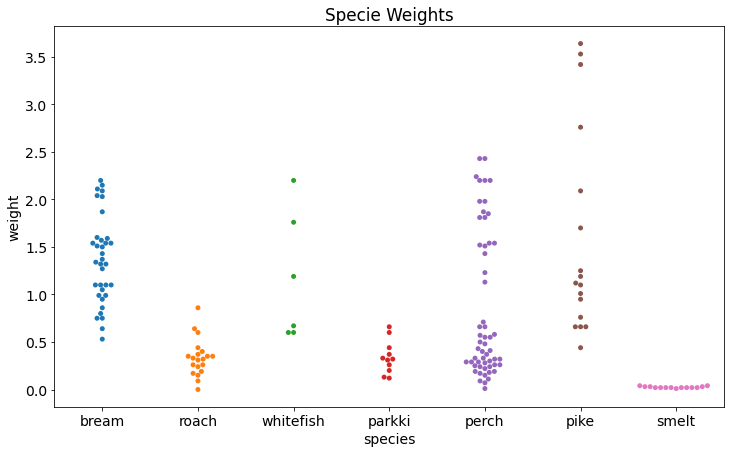

In [9]:
sns.swarmplot(data=df,x='species', y='weight')
plt.title("Specie Weights")

### Interesting, there is a large variance in the pike size. Could be coincidence or outliers on the higher end. Have to investigate further. All other fish seem resonable with weight.

Text(0.5, 1.0, 'Average Specie Lengths')

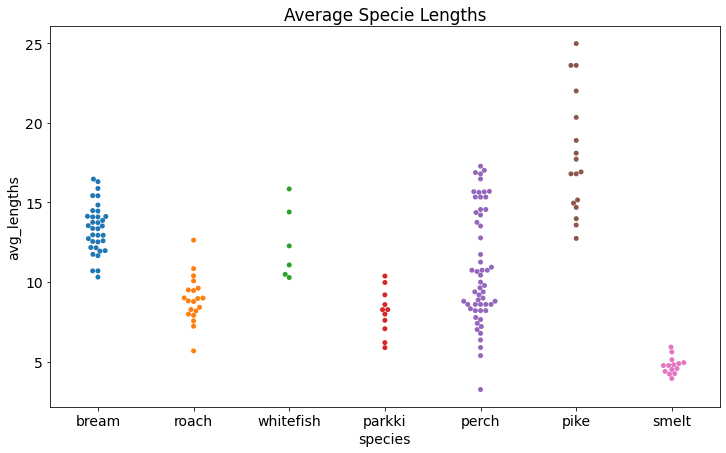

In [10]:
sns.swarmplot(data=df,x='species', y='avg_lengths')
plt.title("Average Specie Lengths")

Text(0.5, 1.0, 'Species Weight Distribution')

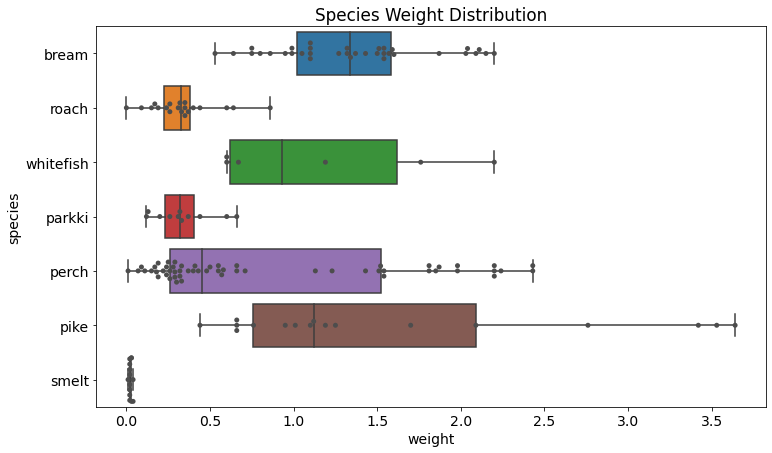

In [13]:
ax = sns.boxplot(x="weight", y="species", data=df, whis=np.inf)
ax = sns.swarmplot(x="weight", y="species", data=df, color=".3")
plt.title("Species Weight Distribution")

### Some research on pike showed that they range in size of 16-22 in on average with a record of 59 in. I found that on average, a 25 in pike will weigh ~3.8 lbs. The pike data points on the upper end were ~ 25 in and 3.5 lbs which are right in line what I found. 

As northern pike grow longer, they increase in weight, and the relationship between length and weight is not linear. The relationship between total length (L, in inches) and total weight (W, in pounds) for nearly all species of fish can be expressed by an equation of the form

{\displaystyle W=cL^{b}.}{\displaystyle W=cL^{b}.}
Invariably, b is close to 3.0 for all species, and c is a constant that varies among species. For northern pike, b = 3.096 and c = 0.000180 (c = 7.089 enables one to put length in meters and weight in kilograms).[9] The relationship described in this section suggests a 20-inch (510 mm) northern pike will weigh about 2 lb (0.91 kg), while a 26-inch (660 mm) northern pike will weigh about 4 lb (1.8 kg).

In [34]:
train, validate, test = fish_split(df)

The shape of the train data set is (83, 9)
The shape of the validate data set is (36, 9)
The shape of the test data set is (40, 9)


In [44]:
train.columns.to_list()

['species',
 'weight',
 'vertical_length',
 'diagonal_length',
 'cross_length',
 'height',
 'width',
 'avg_lengths',
 'est_area']

In [46]:
columns_to_scale = ['weight','vertical_length','diagonal_length','cross_length','height','width','avg_lengths','est_area']
train_scaled, validate_scaled, test_scaled = add_scaled_columns(train, validate, test, MinMaxScaler(), columns_to_scale)

In [47]:
train_scaled.head()

,weight_scaled,vertical_length_scaled,diagonal_length_scaled,cross_length_scaled,height_scaled,width_scaled,avg_lengths_scaled,est_area_scaled
119,0.513736,0.548989,0.557849,0.544144,0.592920,0.851449,0.550048,0.604512
30,0.557692,0.510109,0.529525,0.576126,0.946903,0.735507,0.539942,0.913034
42,0.071429,0.191809,0.198752,0.214414,0.255162,0.307971,0.202117,0.148867
89,0.082418,0.203733,0.217475,0.210811,0.240413,0.340580,0.210780,0.145161
62,0.035714,0.087610,0.094575,0.102703,0.281711,0.166667,0.095284,0.112576
